# Singlet oxygen generation by photosensitizer
## Differential equations

\begin{align}
\frac{\mathrm d[\mathrm{PS}]}{\mathrm dt} &= - k_r[\mathrm{PS}][^1\mathrm O_2]\\
\frac{\mathrm d[^1\mathrm O_2]}{\mathrm dt} &= \frac{1}{V}\Phi_\Delta q_0 \left(1 - 10^{-l\varepsilon [\mathrm{PS}]}\right) - k_\Delta[^1\mathrm O_2] - k_r[\mathrm{PS}][^1\mathrm O_2] \color{gray}{- [^1\mathrm O_2]\left( k_q^\prime [\mathrm{PS}] + \dots\right)} 
\end{align}

where $k_r$ is the bimolecular rate constant of destruction of the photosensitizer (PS) by $^1\mathrm O_2$, $V$ is the volume of irradiated solution in cuvette, $q_0$ is incident photon flux ($[q_0]=\text{einstein}\ \mathrm{s}^{-1}$), $l$ is traveled light distance throught a cuvette, $\varepsilon$ is molar abs. coefficient of PS at irradiation wavelength and $k_\Delta$ is the first order decay rate constant of $^1\mathrm O_2$ to $^3\mathrm O_2$. The $\Phi_\Delta$ is the singlet oxygen quantum yield, based on http://nathan.instras.com/MyDocsDB/doc-557.pdf:

$$\Phi_\Delta = \Phi_{\mathrm T}\left(\frac{k_{en}[^3\mathrm O_2]}{k_{d} + k_{q}[^3\mathrm O_2]}\right)$$
$$k_{en} \approx \frac19 k_{diff.}$$

where $\Phi_{\mathrm T}$ is the quantum yield of the tripet state formation of the PS, $k_{en}$ is rate constant of energy transfer, that is the TT annihilation of PS and $^3\mathrm O_2$, $k_{q}$ is the sum of rate constants of quenching of PS by $^3\mathrm O_2$, ($k_{en} \leq k_q$) and $k_{d}$ is the first order decay rate constant of $^3$PS by radiative and non-radiative processes.

Singlet oxygen quantum yield will be always less or equal than quantum yield of triplet state formation of PS ($\Phi_\Delta \leq \Phi_{\mathrm T}$).


### Equilibrium concentration of $[^1\mathrm O_2]$: steady state approximation

Steady state approximation is fully valid since decay of PS is much slower than changes in $[^1\mathrm O_2]$:

$$\frac{\mathrm d[^1\mathrm O_2]}{\mathrm dt} = 0$$

$$[^1\mathrm O_2] = \frac{\Phi_\Delta q_0 \left(1 - 10^{-l\varepsilon [\mathrm{PS}]}\right)}{V\left( k_\Delta + k_r[\mathrm{PS}] \right)}$$

Then, 

$$\frac{\mathrm d[\mathrm{PS}]}{\mathrm dt} = - k_r[\mathrm{PS}]\frac{\Phi_\Delta q_0 \left(1 - 10^{-l\varepsilon [\mathrm{PS}]}\right)}{V\left( k_\Delta + k_r[\mathrm{PS}] \right)}$$

this has not analytical solution or is extremely complicated

#### 1$^{\mathrm{st}}$ approximation (full absorption regime, $A>2$ and $k_\Delta \gg k_r[\mathrm{PS}]$):

$$\frac{\mathrm d[\mathrm{PS}]}{\mathrm dt} = - \frac{k_r\Phi_\Delta q_0 }{V k_\Delta}[\mathrm{PS}]$$

$\gg$ first order law $\dots$


#### 2$^{\mathrm{nd}}$ approximation (almost no absorption, $A\approx 0$ and $k_\Delta \gg k_r[\mathrm{PS}]$):

$e^x \approx 1+x$ for small $x$, therefore $10^x \approx 1+x\ln10$ for small $x$

$$\frac{\mathrm d[\mathrm{PS}]}{\mathrm dt} = - \frac{k_r\Phi_\Delta q_0 l\varepsilon\ln(10)}{V k_\Delta} [\mathrm{PS}]^2$$

$\gg$ second order law $\dots$


In [168]:
k_Delta = 1/9.4e-6
k_Delta

106382.97872340426

In [278]:
import numpy as np
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import math
# from IPython import display
from scipy.integrate import odeint

from IPython.display import display, clear_output, Image
# from plotly.widgets import GraphWidget

py.offline.init_notebook_mode(connected=True)

from plotly.offline import iplot

import matplotlib.pyplot as plt

layout = go.Layout(
    title='',
    xaxis=dict(
        title="Time / s",
#         range=[-0.1, 10],
        showline=True,
        mirror='ticks',
        zeroline=False
    ),
    yaxis=dict(
        title="Concentration / M",
#         range=[0,1.1],
        showline=True,
        color='red',
        mirror='ticks',
        zeroline=False
    ),
    yaxis2=dict(
        title='Absorbance',
        overlaying='y',
        side='right',
        color='blue'
    )
)

fig = go.FigureWidget(data=[
    dict(
        type='scatter',
        mode='lines',
        yaxis='y1',
        line=dict(
                color='red',
                width=2
            )),
    dict(
        type='scatter',
        mode='lines',
        yaxis='y2',
        line=dict(
            color='blue',
            width=2,
#             dash='dash'
            )),
#     dict(
#         type='scatter',
#         mode='lines',
#         yaxis='y1',
#         line=dict(
#             color='black',
#             width=1,
#             dash='dot'
#             )),
     dict(
        type='scatter',
        mode='lines',
         yaxis='y2',
        line=dict(
            color='black',
            width=2,
            dash='dot'
            )),
    dict(
        type='scatter',
        mode='lines',
         yaxis='y2',
        line=dict(
            color='green',
            width=2,
            dash='dot'
            )),
], layout=layout)

N = 500

times = np.linspace(0, 10, num=N, dtype=np.float64)
V = 3e-3
alpha = 0.99  # the decrese of initial concentration of PS

fig.data[0].x = times
fig.data[1].x = times
fig.data[2].x = times
fig.data[3].x = times
# fig.data[4].x = times
fig.data[0].name = '[<sup>1</sup>O<sub>2</sub>]'
fig.data[1].name = 'PS Abs'
# fig.data[2].name = '<sup>1</sup>O<sub>2</sub> initial equlibrium conc.'
fig.data[2].name = 'PS Abs (2nd order approx)'
fig.data[3].name = 'PS Abs (1st order approx)'

def calc_eq_conc(c_PS=1e-4, Phi_Delta=0.2, k_r=1e7, k_delta=1e5, V=V, q0=1e-3, epsilon=2e5):
    return Phi_Delta * q0 * (1-10**(-epsilon * c_PS)) / (V * (k_delta + k_r * c_PS))


def update(PS_0, Phi_Delta, k_r, k_delta, V, q0, epsilon, eq_conc, t_range, t_autorange, alpha=0.95):
    
    # approx. solution based on second order and k_delta >> k_r * cPS
    _K = Phi_Delta * q0 * np.log(10) * epsilon * k_r / V
    
    # t = k_delta *  alpha / (_K * (1-alpha) * c0)
    t_max = k_delta *  alpha / (_K * (1 - alpha) * PS_0)
    
    times = np.linspace(0, t_max if t_autorange else t_range, num=N, dtype=np.float64)
    
    fig.data[0].x = times
    fig.data[1].x = times
    fig.data[2].x = times
    fig.data[3].x = times

    # intial equilibrium singlet oxygen concentration
    c_1_O2_eq = calc_eq_conc(PS_0, Phi_Delta, k_r, k_delta, V, q0, epsilon)
    
    # approx solution based on second order (almost no light absorbed)
    A_PS_approx_2nd = epsilon * k_delta / (_K * times + k_delta / PS_0)
    
    # approx solution based on first order (all light absorbed)
    A_PS_approx_1st = epsilon * PS_0 * np.exp(-k_r * Phi_Delta * q0 * times / (V * k_delta))
    
    PS_0 *= 1e6  # need in uM units
    k_r *= 1e-6
    q0 *= 1e6
    epsilon *= 1e-6
    
    def solve(conc, t):
        c_PS, c_1_O2 = conc

        dc_PS_dt = - k_r * c_PS * c_1_O2
        dc_1_O2_dt = + Phi_Delta * q0 * (1 - 10 ** (-epsilon * c_PS)) / V  - k_delta * c_1_O2 - k_r * c_PS * c_1_O2

        return [dc_PS_dt, dc_1_O2_dt]
    
    def solve_approx(c, t):
        return - k_r * c * Phi_Delta * q0 * (1 - 10** (-epsilon * c)) / (V * (k_delta + k_r * c))
    
    if eq_conc:  # steady state approximation
        c_PS = odeint(solve_approx, PS_0, times).squeeze()  # convert back to M units
        c_1_O2 = calc_eq_conc(c_PS, Phi_Delta, k_r, k_delta, V, q0, epsilon) * 1e-6
        c_PS *= 1e-6
        
    else:
        result = odeint(solve, [PS_0, 0], times) * 1e-6  # convert back to M units
        c_PS = result[:, 0] 
        c_1_O2 = result[:, 1]
    
#     fig.data[0].y = c_PS #/ c_PS.max()
    fig.data[0].y = c_1_O2
    fig.data[1].y = c_PS * epsilon * 1e6
    
#     fig.data[2].y = np.ones(times.shape[0]) * c_1_O2_eq  # equlibrium concentration at initial time
    
    fig.data[2].y = A_PS_approx_2nd
    fig.data[3].y = A_PS_approx_1st
    

# py.offline.iplot(fig)

# PS_0 = widgets.FloatSlider(min=0, max=1e-5, value=5e-6, step=1e-6, description='[PS]<sub>0</sub>')
Phi_Delta = widgets.FloatSlider(min=0, max=1, value=0.2, step=0.1,description='Φ<sub>Δ</sub>')
# k_r = widgets.FloatSlider(min=0, max=1e7, value=1e7, step=1e6,description='k<sub>r</sub>')
k_delta = widgets.FloatSlider(min=1e4, max=5e5, value=k_Delta, step=1e4,description='k<sub>Δ</sub>')
# V = widgets.FloatSlider(min=1e-3, max=5e-3, value=2e-3, step=1e-3,description='V')
# q0 = widgets.FloatSlider(min=0, max=1e-8, value=5e-9, step=1e-9,description='q<sub>0</sub>')
epsilon = widgets.FloatSlider(min=5e4, max=3e5, value=2e5, step=1e4, description='epsilon')

# the percentual decrese of initial concentration of PS
alpha = widgets.FloatSlider(min=0.01, max=0.99, value=0.95, step=0.01, description='alpha')

PS_0 = widgets.FloatLogSlider(
    value=1e-5,
    base=10,
    min=-7, # max exponent of base
    max=-4, # min exponent of base
    step=0.2, # exponent step
    description='[PS]<sub>0</sub>'
)

q0 = widgets.FloatLogSlider(
    value=1e-7,
    base=10,
    min=-9, # max exponent of base
    max=-2, # min exponent of base
    step=0.2, # exponent step
    description='q<sub>0</sub>'
)

k_r = widgets.FloatLogSlider(
    value=1e6,
    base=10,
    min=3, # max exponent of base
    max=9, # min exponent of base
    step=0.2, # exponent step
    description='k<sub>r</sub>'
)

t_range = widgets.FloatLogSlider(
    value=1e5,
    base=10,
    min=-3, # max exponent of base
    max=5, # min exponent of base
    step=0.2, # exponent step
    description='times range'
)

eq_conc = widgets.Checkbox(value=True, description='Use Bodenstein approx.')
t_autorange = widgets.Checkbox(value=True, description='Time autorange')

def find_nearest_idx(array, value):
    if isinstance(value, (int, float)):
        value = np.asarray([value])
    else:
        value = np.asarray(value)

    result = np.empty_like(value, dtype=int)
    for i in range(value.shape[0]):
        idx = np.searchsorted(array, value[i], side="left")
        if idx > 0 and (
                idx == len(array) or math.fabs(value[i] - array[idx - 1]) < math.fabs(value[i] - array[idx])):
            result[i] = idx - 1
        else:
            result[i] = idx
    return result if result.shape[0] > 1 else result[0]

In [251]:
widgets.interactive(update, PS_0=PS_0, Phi_Delta=Phi_Delta, k_r=k_r, 
                    k_delta=k_delta, V=V, q0=q0, epsilon=epsilon, eq_conc=eq_conc,
                    t_range=t_range, t_autorange=t_autorange, alpha=alpha)

display(widgets.HBox([PS_0, Phi_Delta, k_r]))
# display(widgets.HBox([k_r, k_delta]))
display(widgets.HBox([q0, epsilon, k_delta]))
display(widgets.HBox([eq_conc, t_autorange, alpha]))
display(t_range)

fig.update_layout(legend=dict(x=-.05, y=1.35))

# iplot(fig)
display(fig)

FloatLogSlider(value=100000.0, description='times range', max=5.0, min=-3.0, step=0.2)

FigureWidget({
    'data': [{'line': {'color': 'red', 'width': 2},
              'mode': 'lines',
            …

## Integration of $[^1\mathrm O_2]$





In [336]:
alpha = 0.96 # the percentual decrese of initial concentration of PS

PS_0 = 1e-3
Phi_Delta=0.2
k_r=1e7
k_delta=1/9.4e-6
V=3e-3
q0=1e-8
epsilon=2e5


def _solve_time_profiles(PS_0=PS_0, Phi_Delta=Phi_Delta, k_r=k_r, k_delta=k_delta, V=V, q0=q0, epsilon=epsilon, 
                         alpha=alpha, num=1000):
    
    # approx. solution based on second order and k_delta >> k_r * cPS
    _K = Phi_Delta * q0 * np.log(10) * epsilon * k_r / V
    # estimation of maximum time so that times will contain alpha of profile decay
    t_max = k_delta * alpha / (_K * (1 - alpha) * PS_0) * (epsilon * PS_0 if epsilon * PS_0 > 1 else 1) * 1
    
    times = np.linspace(0, t_max, num)
    
    def _solve(c, t):
        return - k_r * c * Phi_Delta * q0 * (1 - 10** (-epsilon * c)) / (V * (k_delta + k_r * c))
    
    c_PS = odeint(_solve, PS_0, times).squeeze()
    
    c_target = (1-alpha) * PS_0
    
    sort_idxs = np.argsort(c_PS)
    _c_PS = c_PS[sort_idxs]
    _times = times[sort_idxs]
    
    t_idx = find_nearest_idx(_c_PS, c_target)
    
    assert t_idx < _times.shape[0] - 1
#     print(c_target, t_idx, _times[t_idx])
    
#     times[t_idx]
    c_1_O2 = calc_eq_conc(c_PS, Phi_Delta=Phi_Delta, k_r=k_r, k_delta=k_delta, V=V, q0=q0, epsilon=epsilon)
    return [times, c_PS, c_1_O2]


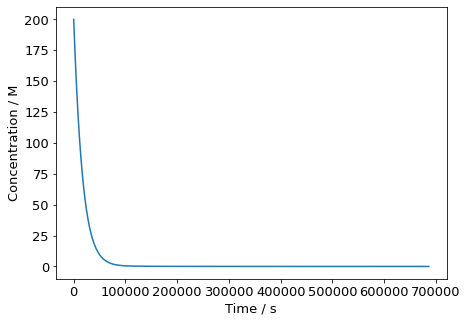

In [415]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})
plt.rcParams['figure.figsize'] = [7, 5]

t, c_PS, c_1_O2 = _solve_time_profiles(PS_0=PS_0, Phi_Delta=Phi_Delta, k_r=k_r,
                                       k_delta=k_delta, V=V, q0=q0, epsilon=epsilon, alpha=alpha)


plt.plot(t, c_PS*epsilon)
# plt.plot(t, c_1_O2)
plt.xlabel('Time / s')
plt.ylabel('Concentration / M')
plt.show()

In [338]:
def sweep(PS_0=PS_0, Phi_Delta=Phi_Delta, k_r=k_r, k_delta=k_delta, V=V, q0=q0, epsilon=epsilon, alpha=alpha):
    pass

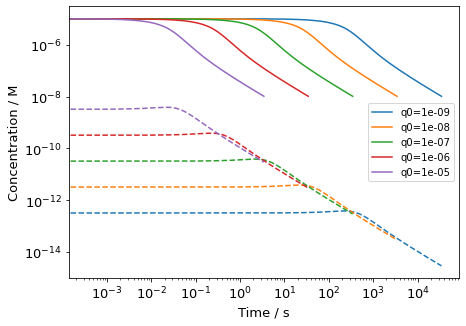

array([6.8493142e-10, 6.8493142e-10, 6.8493142e-10, 6.8493142e-10,
       6.8493142e-10])

In [442]:
alpha = 0.998 # the percentual decrese of initial concentration of PS
num = 10000  # number of points

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

PS_0 = 1e-5
Phi_Delta=0.2
k_r=1e10
k_delta=1/9.4e-6
# k_delta=1

V=3e-3
# q0=1e-8
epsilon=2e5

q0s = np.logspace(-9, -5, 5)
n = q0s.shape[0]

times = np.zeros((n, num))
c_PSs = np.zeros_like(times)
c_1_O2s = np.zeros_like(times)
integrals = np.zeros(n)

for i in range(n):
    times[i], c_PSs[i], c_1_O2s[i] = _solve_time_profiles(PS_0=PS_0, Phi_Delta=Phi_Delta, k_r=k_r,
                                       k_delta=k_delta, V=V, q0=q0s[i], epsilon=epsilon, alpha=alpha, num=num)
    
    integrals[i] = np.trapz(c_1_O2s[i], x=times[i])

    label = f'q0={q0s[i]:.2g}'
    plt.semilogx(times[i], c_PSs[i], label=label, color=colors[i])
    plt.semilogx(times[i], c_1_O2s[i],  color=colors[i], ls='--')
    plt.yscale('log')
    
plt.xlabel('Time / s')
plt.ylabel('Concentration / M')
plt.legend(fontsize=10)
plt.show()


integrals
